In [6]:
import pickle
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math
import numpy as np


with open('ensemble_sigma_noise_fidelity.pkl', 'rb') as f:
    F_fastest = pickle.load(f)
f.close()

with open('quasi_energy_fluc_noise_infidelity.pkl', 'rb') as f:
    F_quasi_energy_fluc = pickle.load(f)
f.close()

with open('ensemble_sigma_noise_sigma.pkl', 'rb') as f:
    sigma_list = pickle.load(f)
f.close()

F_quasi_energy_fluc = [(100 - x) for x in F_quasi_energy_fluc]

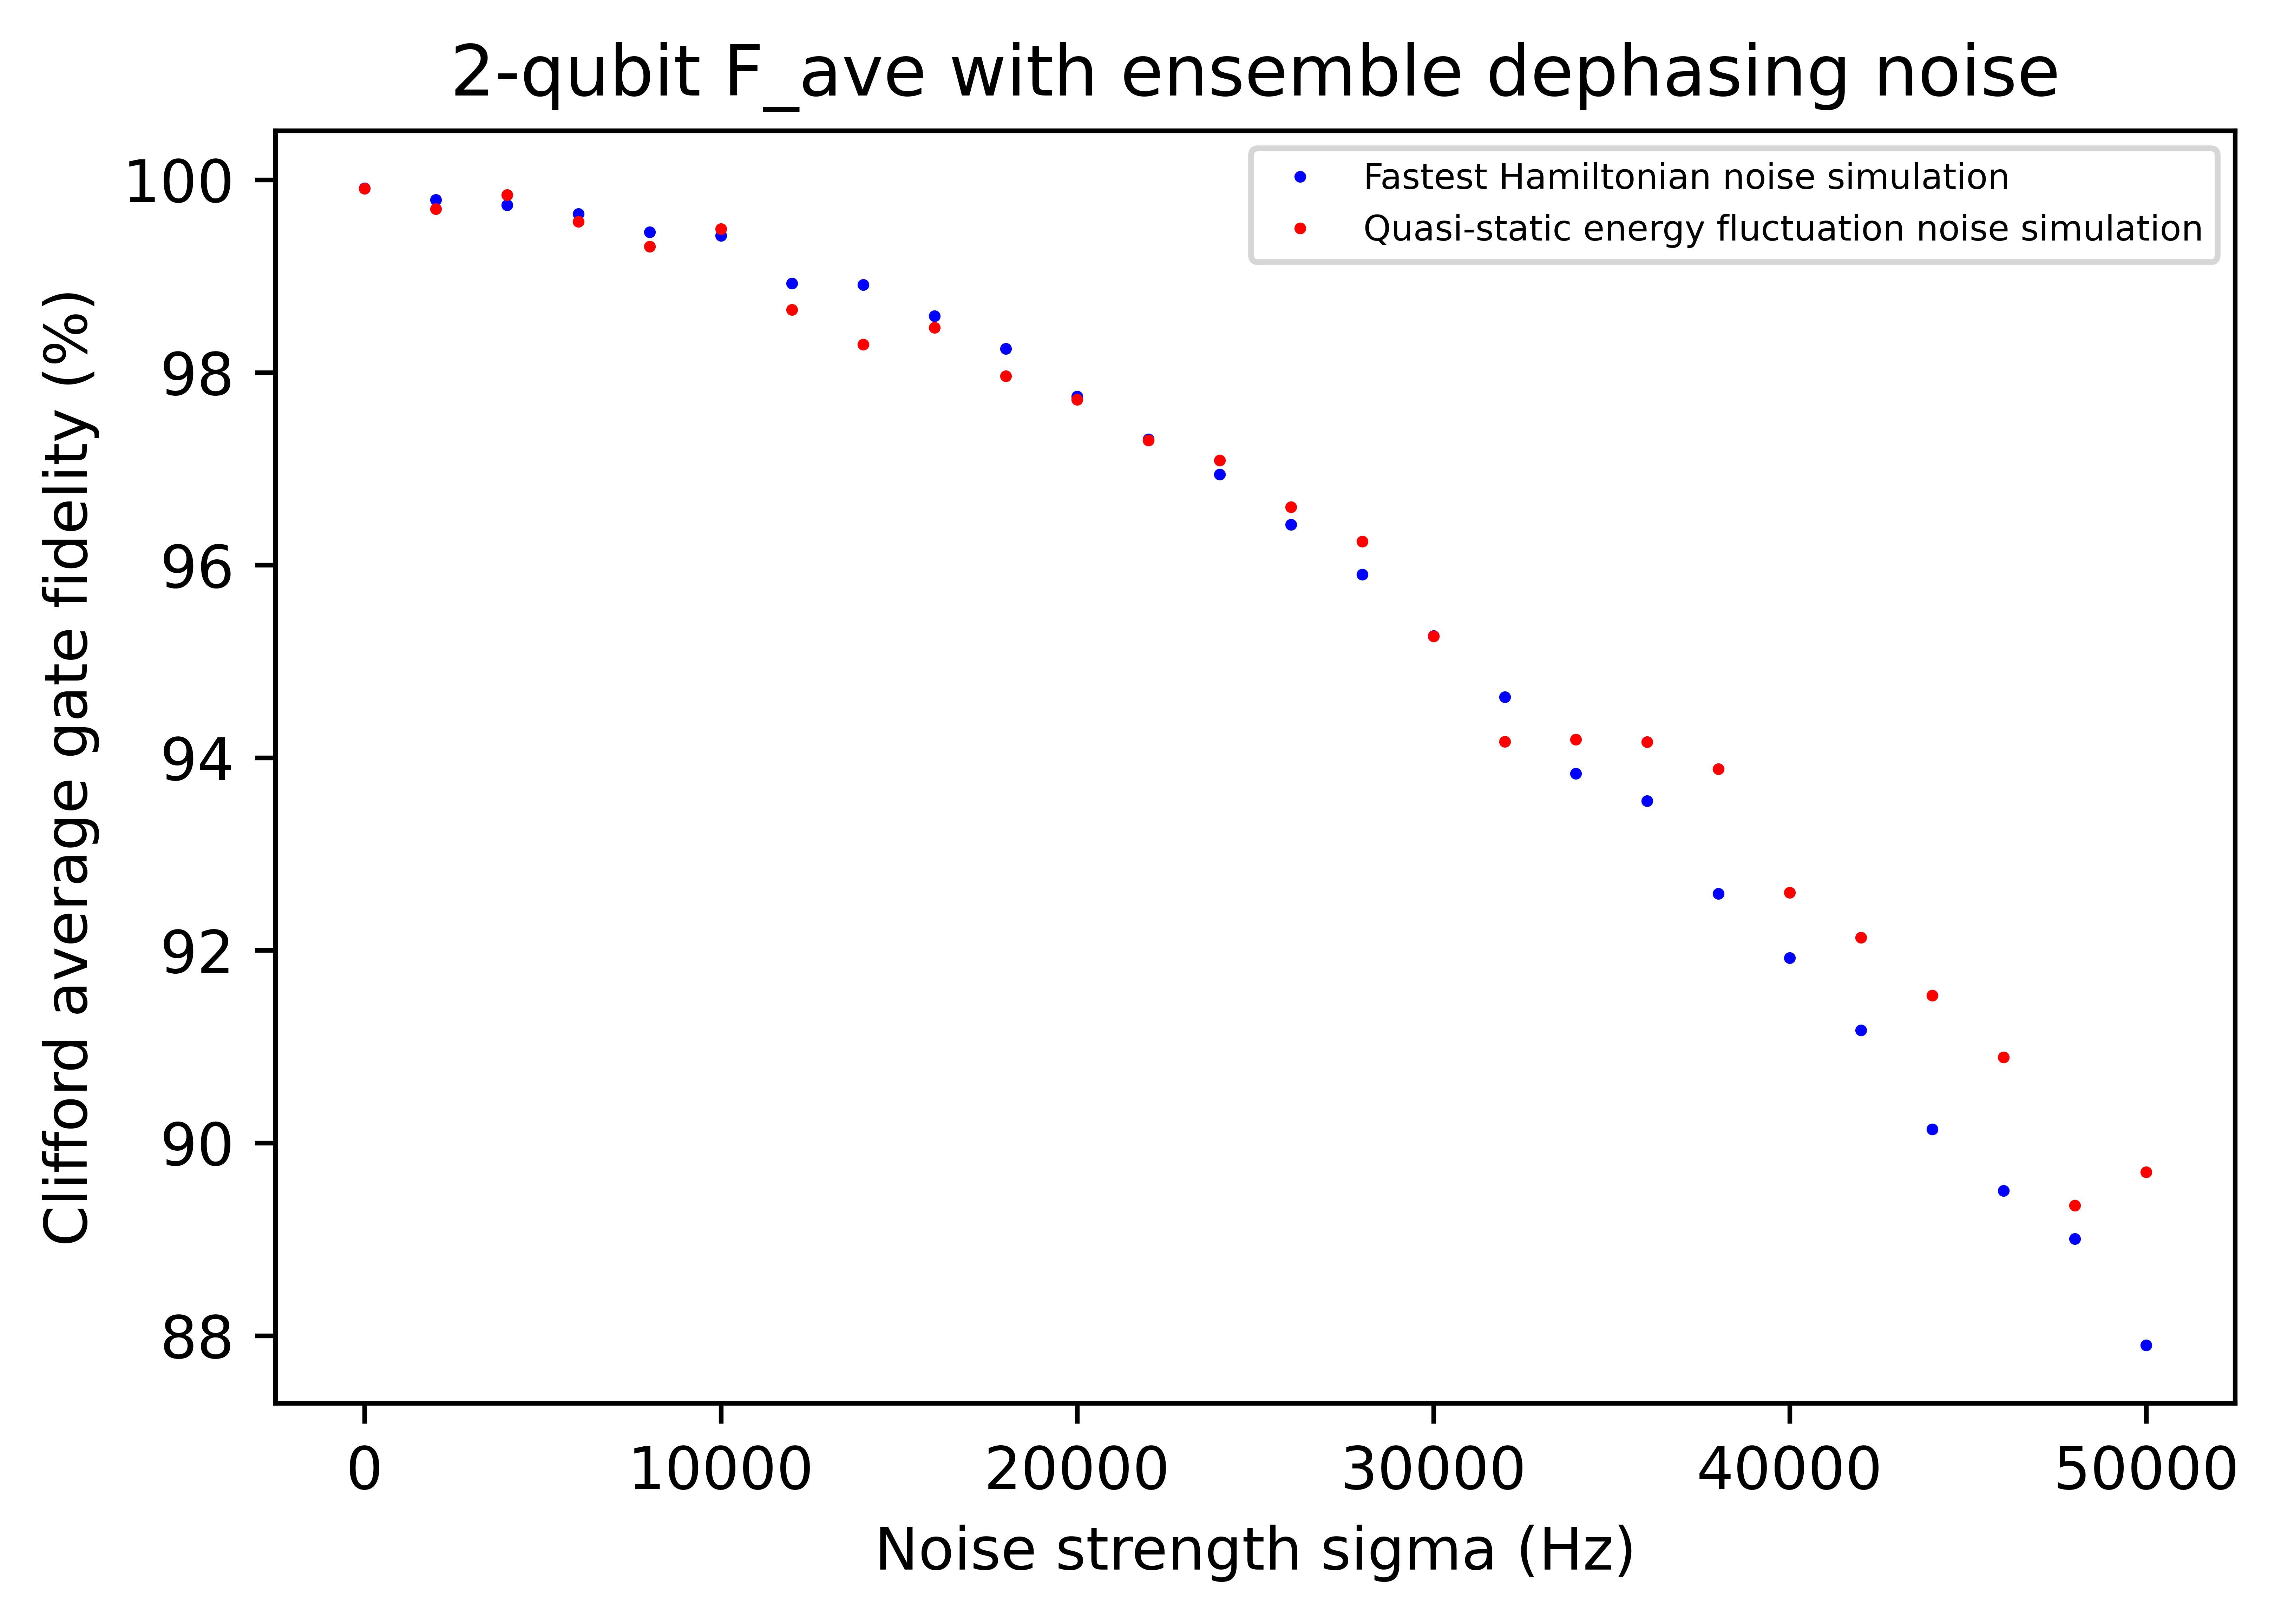

In [7]:
plt.figure(dpi=1200)
plt.title('2-qubit F_ave with ensemble dephasing noise')

plt.plot(sigma_list, F_fastest, 'bo', markersize=1, label='Fastest Hamiltonian noise simulation')
plt.plot(sigma_list, F_quasi_energy_fluc, 'ro', markersize=1, label='Quasi-static energy fluctuation noise simulation')

plt.xlabel("Noise strength sigma (Hz)")
plt.ylabel("Clifford average gate fidelity (%)")
plt.legend(prop={'size': 6})
plt.show()


In [9]:
# 0~20000

# with open('s_ensemble_sigma_noise_fidelity_2q_fastest.pkl', 'rb') as f:
#     s_F_fastest = pickle.load(f)
# f.close()

with open('s_ensemble_sigma_noise_fidelity_2q_slowest.pkl', 'rb') as f:
    s_F_slowest = pickle.load(f)
f.close()

with open('s_ensemble_sigma_noise_fidelity_2q_5.14.pkl', 'rb') as f:
    s_F_pulse = pickle.load(f)
f.close()

with open('s_ensemble_sigma_noise_sigma.pkl', 'rb') as f:
    s_sigma_list = pickle.load(f)
f.close()

with open('s_thr_ensemble_sigma_f_hamiltonian_avg_2q.pkl', 'rb') as f:
    s_F_avg_ens_thr = pickle.load(f)
f.close()

with open('s_thr_ensemble_sigma_f_hamiltonian_rb_2q.pkl', 'rb') as f:
    s_F_wallman_ens_thr = pickle.load(f)
f.close()

with open('s_thr_ensemble_sigma_list_2q.pkl', 'rb') as f:
    s_sigma_list_thr = pickle.load(f)
f.close()

s_F_avg_ens_thr.insert(0, 1)
s_F_wallman_ens_thr.insert(0, 1)
s_sigma_list_thr = np.insert(s_sigma_list_thr, 0, 0)

s_F_avg_ens_thr = [x * 100 for x in s_F_avg_ens_thr]
s_F_wallman_ens_thr = [x * 100 for x in s_F_wallman_ens_thr]

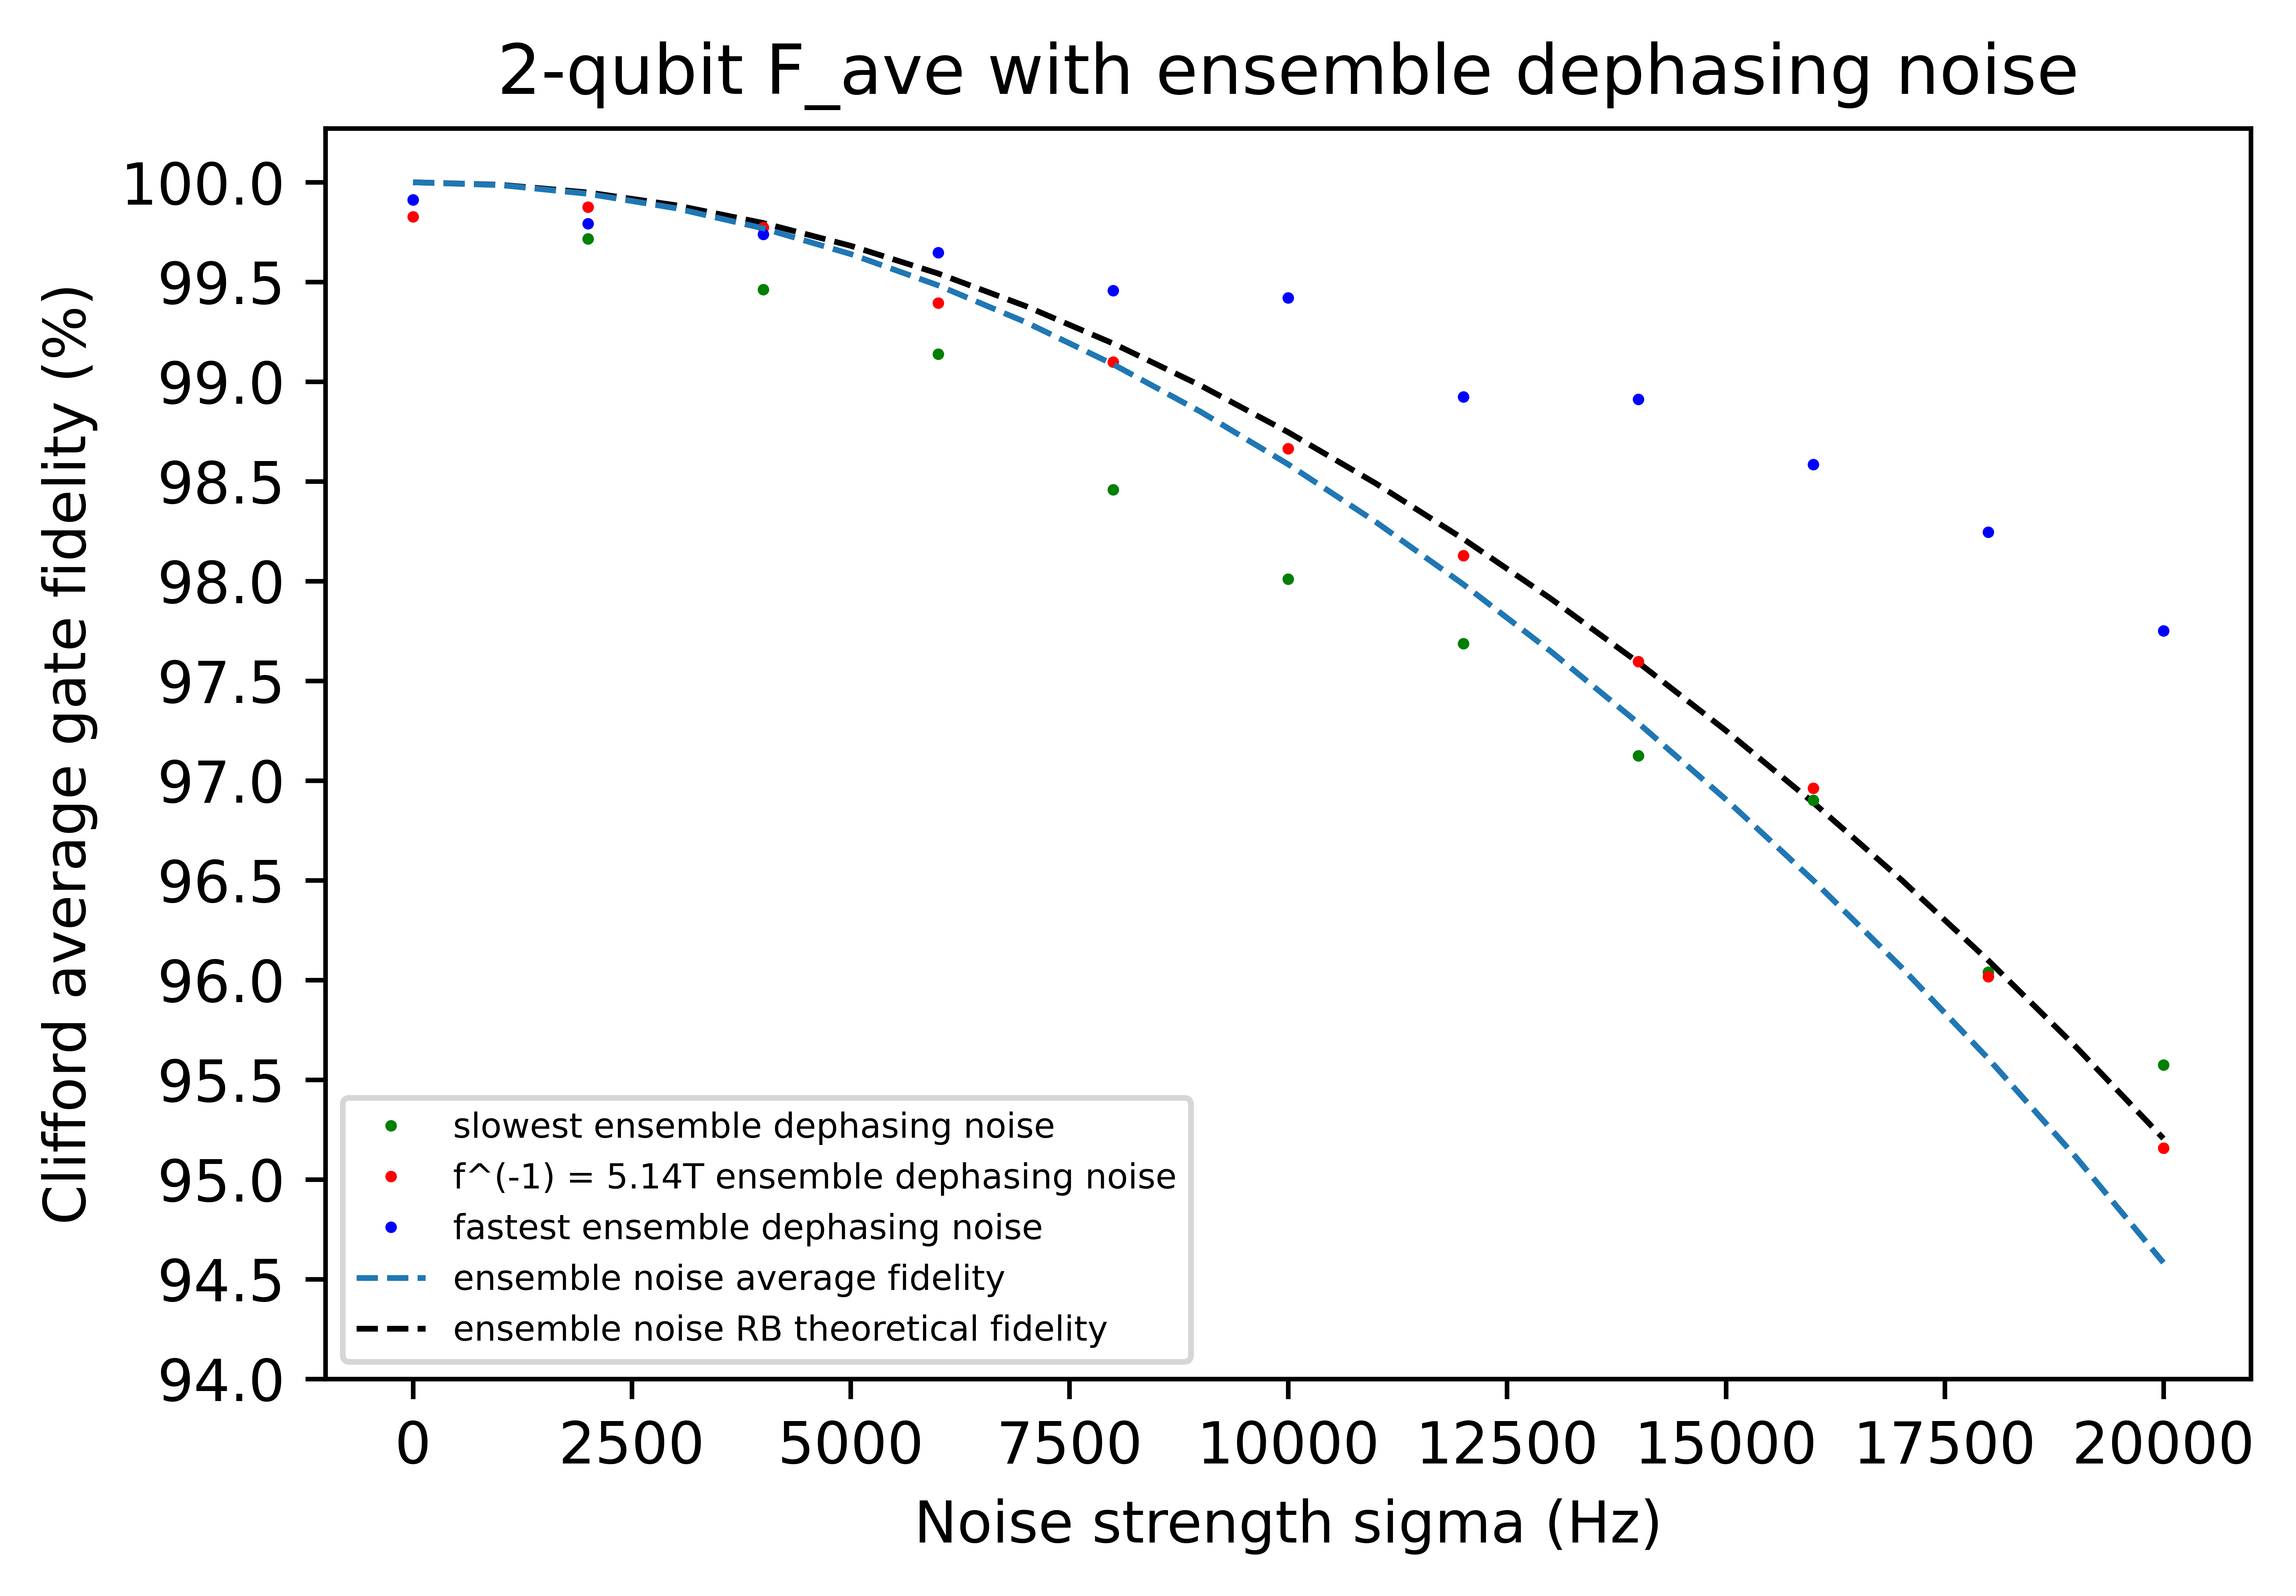

In [15]:
plt.figure(dpi=1200)
plt.title('2-qubit F_ave with ensemble dephasing noise')

plt.plot(s_sigma_list, s_F_slowest, 'go', markersize=1, label='slowest ensemble dephasing noise')
plt.plot(s_sigma_list, s_F_pulse, 'ro', markersize=1, label='f^(-1) = 5.14T ensemble dephasing noise')
plt.plot(sigma_list[:11], F_fastest[:11], 'bo', markersize=1, label='fastest ensemble dephasing noise')

plt.plot(s_sigma_list_thr, s_F_avg_ens_thr, '--', color='tab:blue', linewidth=1, label='ensemble noise average fidelity', zorder=2)
plt.plot(s_sigma_list_thr, s_F_wallman_ens_thr, '--', color='black', linewidth=1, label='ensemble noise RB theoretical fidelity', zorder=1)

plt.xlabel("Noise strength sigma (Hz)")
plt.ylabel("Clifford average gate fidelity (%)")
locs, labels = plt.yticks()
plt.yticks(np.arange(94, 100.5, step=0.5))  # Set label locations.
plt.legend(prop={'size': 6}, loc="lower left")
plt.show()

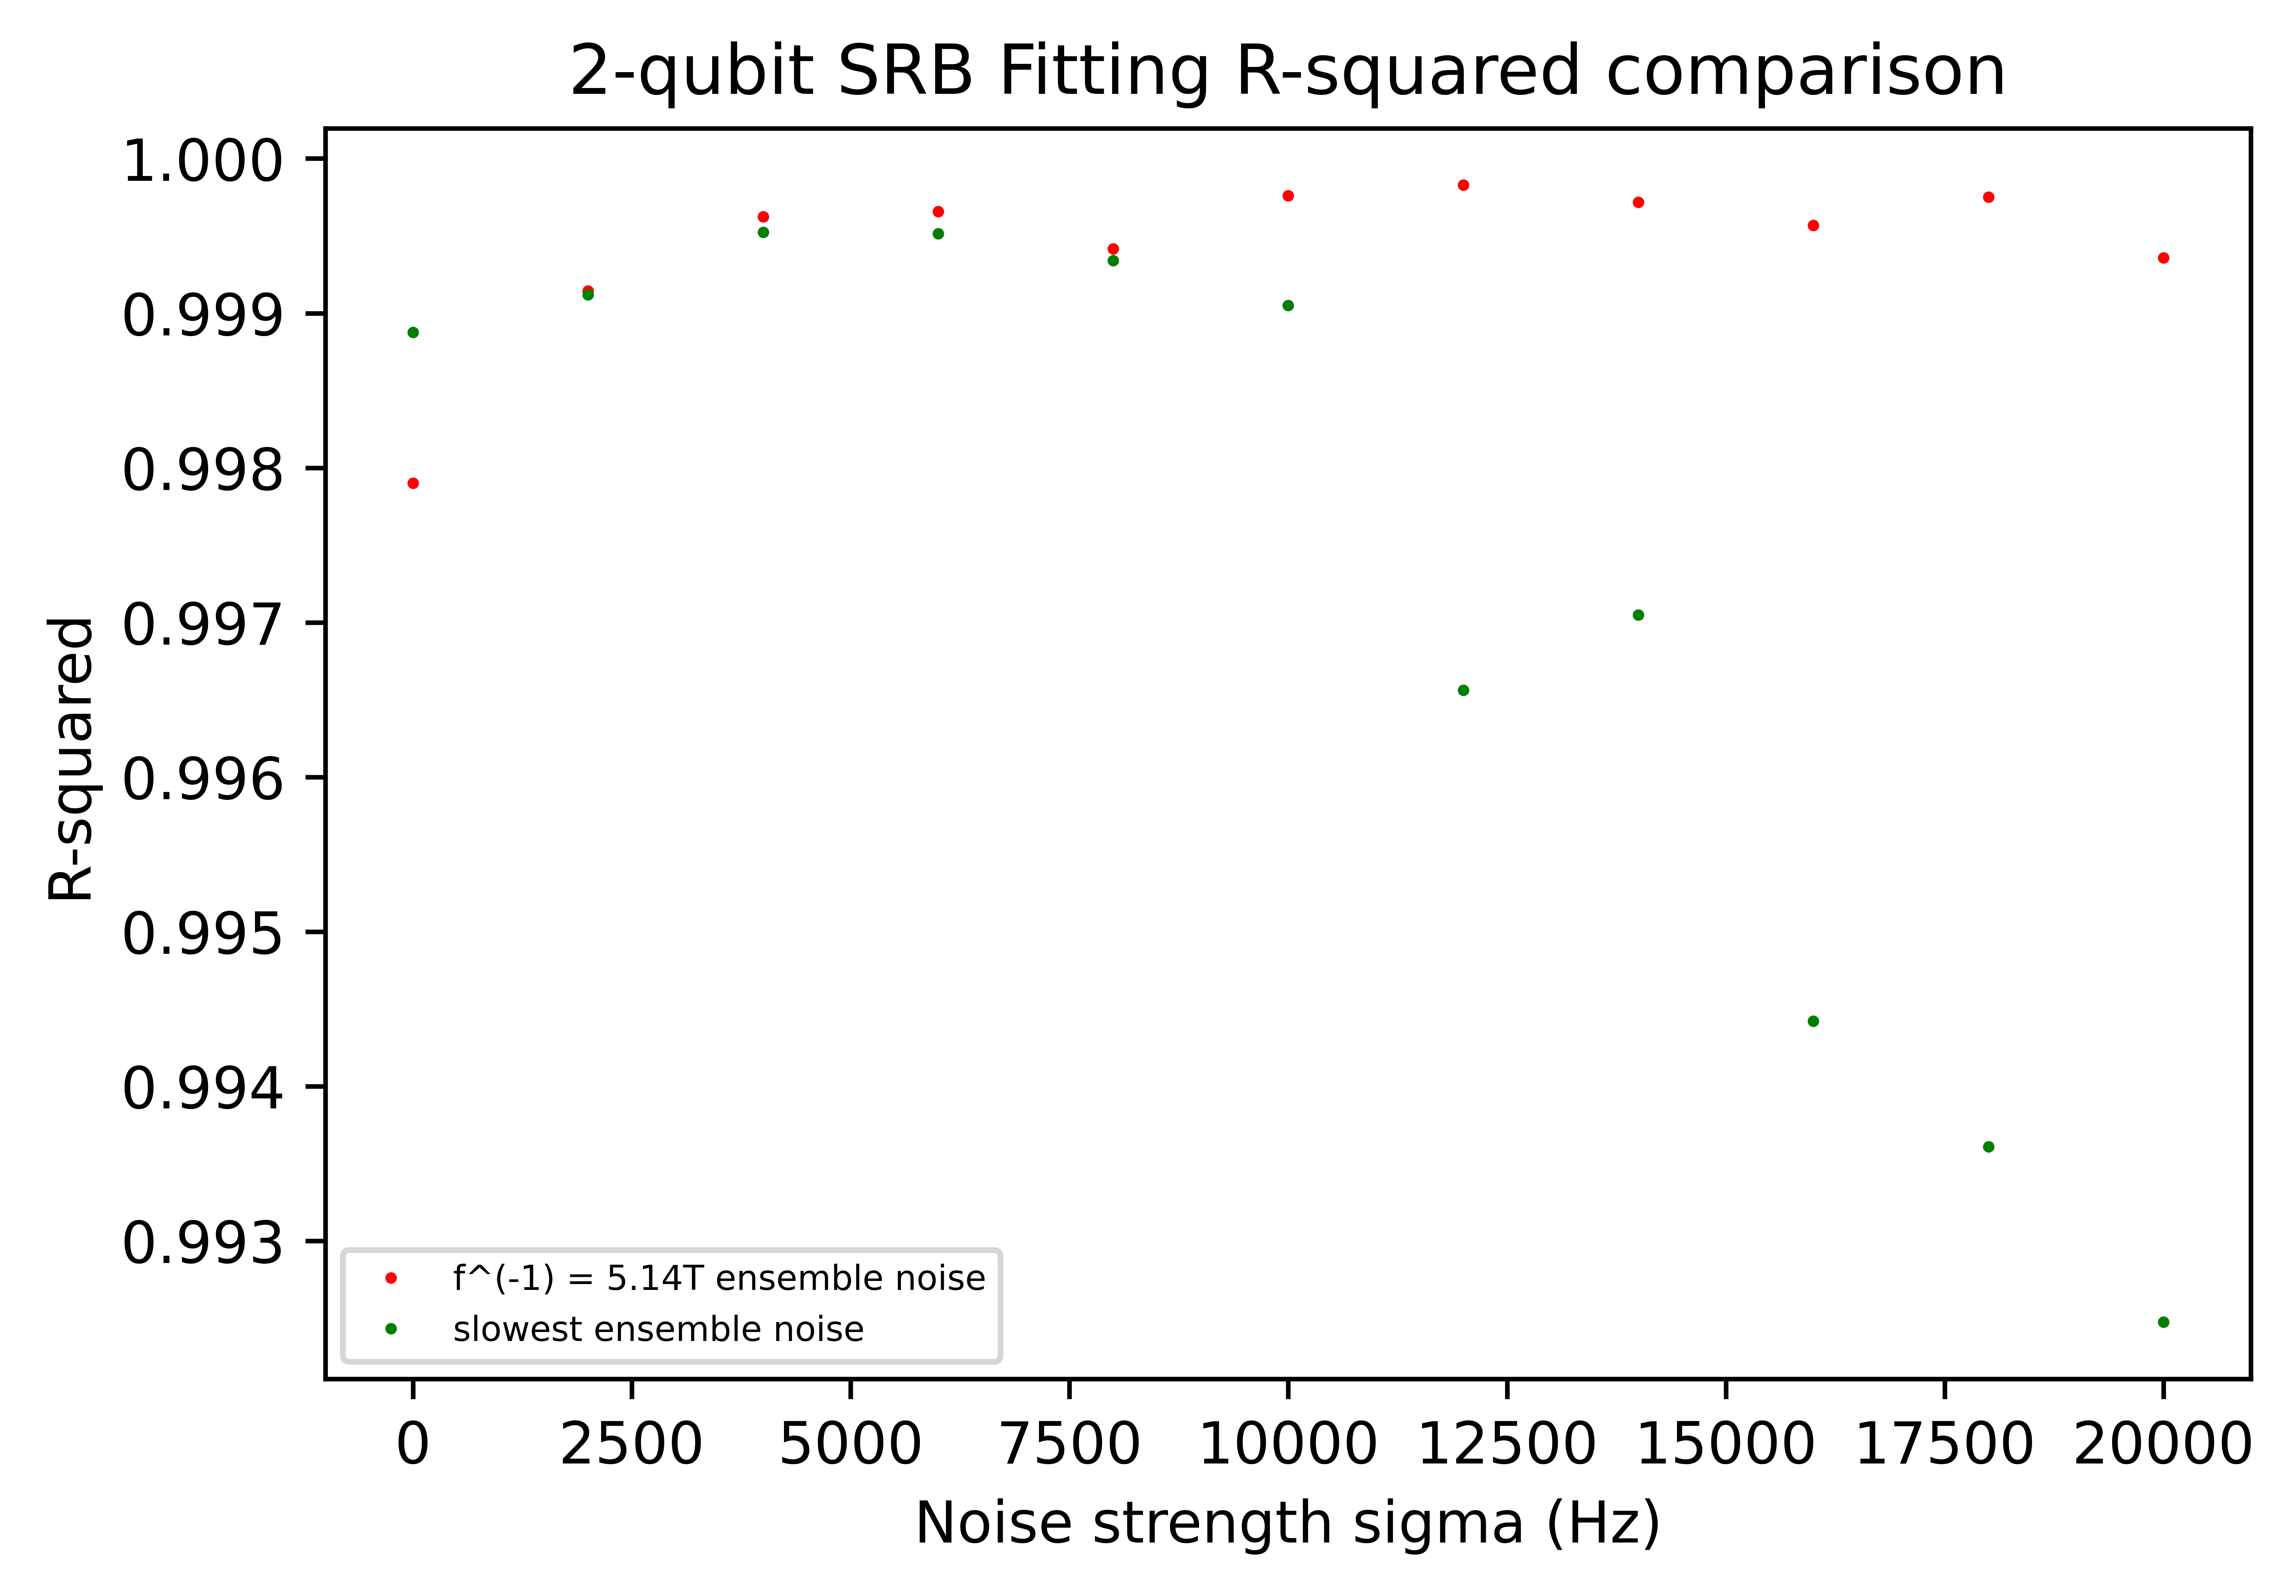

In [16]:
with open('ensemble_sigma_r_squared_2q_5.14.pkl', 'rb') as f:
    r_pulse = pickle.load(f)
f.close()

# with open('ensemble_sigma_r_squared_2q_fastest.pkl', 'rb') as f:
#     r_fastest = pickle.load(f)
# f.close()

with open('ensemble_sigma_r_squared_2q_slowest.pkl', 'rb') as f:
    r_slowest = pickle.load(f)
f.close()


plt.figure(dpi=1200)
plt.title('2-qubit SRB Fitting R-squared comparison')

plt.plot(s_sigma_list, r_pulse, 'ro', markersize=1, label='f^(-1) = 5.14T ensemble noise')
# plt.plot(s_sigma_list, r_fastest, 'bo', markersize=1, label='fastest ensemble noise')
plt.plot(s_sigma_list, r_slowest, 'go', markersize=1, label='slowest ensemble noise')


plt.xlabel("Noise strength sigma (Hz)")
plt.ylabel("R-squared")
plt.legend(prop={'size': 6})
plt.show()